In [5]:
import pandas as pd 
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('spam.csv')
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Data Cleaning and Prepocessing

In [7]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f'[{string.punctuation}]', '', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)
    return text

# Define the remove stop words function
def remove_stop_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_tokens)

# Apply the cleaning functions
data['Message'] = data['Message'].apply(clean_text).apply(remove_stop_words)

print(data.head())

  Category                                            Message
0      ham  jurong point crazy available bugis n great wor...
1      ham                            ok lar joking wif u oni
2     spam  free entry 2 wkly comp win fa cup final tkts 2...
3      ham                        u dun say early hor u c say
4      ham                      nah dont think goes usf lives


In [8]:
data['label'] = data['Category'].apply(lambda x: 0.0 if x == 'ham' else 1.0)
data.head()

,Category,Message,label
0,ham,jurong point crazy available bugis n great wor...,0.0
1,ham,ok lar joking wif u oni,0.0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1.0
3,ham,u dun say early hor u c say,0.0
4,ham,nah dont think goes usf lives,0.0


In [9]:
#Need to reduce the number of features from 3000 to 100, too many features to run for PCA+GMM
X = data['Message']
y = data['label']

#The model we will need to evaluate in train, test, validation set. 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = tfidf_vectorizer.fit_transform(X)
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [10]:
feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# Display the first few rows of the DataFrame
tfidf_df

,amp,ask,babe,buy,care,cash,claim,come,contact,cos,...,want,wat,way,week,went,win,won,work,yeah,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.616585,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.575093,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.437018,0.0,0.477017,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.473208,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.543524,0.0,0.000000,0.000000,0.0,0.0,0.0


# PCA

In [15]:
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

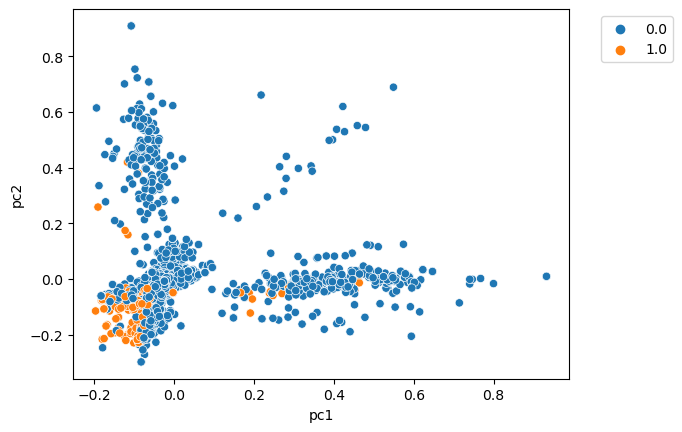

In [17]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_df) 
reduced.shape
pca

reduced_df = pd.DataFrame(reduced, columns=['pc1','pc2']).join(y)

# 0 is non spam 1 is spam
sns.scatterplot(data=reduced_df, x='pc1', y='pc2', hue='label')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

## t-SNE

We want to also use t-SNE to reduce the dimensionality of our data and for its visualization. The visualization can let us find potential patterns that could be used for classification. 

In [7]:
from sklearn.manifold import TSNE

def plot_TSNE(perplexity=30, ax=None):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=99)
    tsne = tsne.fit_transform(tfidf_df)
    ax.scatter(tsne[y == 0, 0], tsne[y == 0, 1], c='blue', label='Not Spam', s=10)
    ax.scatter(tsne[y == 1, 0], tsne[y == 1, 1], c='red', label='Spam', s=10)
    ax.set_title(f't-SNE Visualization with Perplexity = {perplexity}')
    ax.legend(loc='lower right', fontsize=10)
    ax.set_xlabel('C1')
    ax.set_ylabel('C2')

By [this article](https://distill.pub/2016/misread-tsne/), we want to first try T-SNE with perplexity values 5-50.

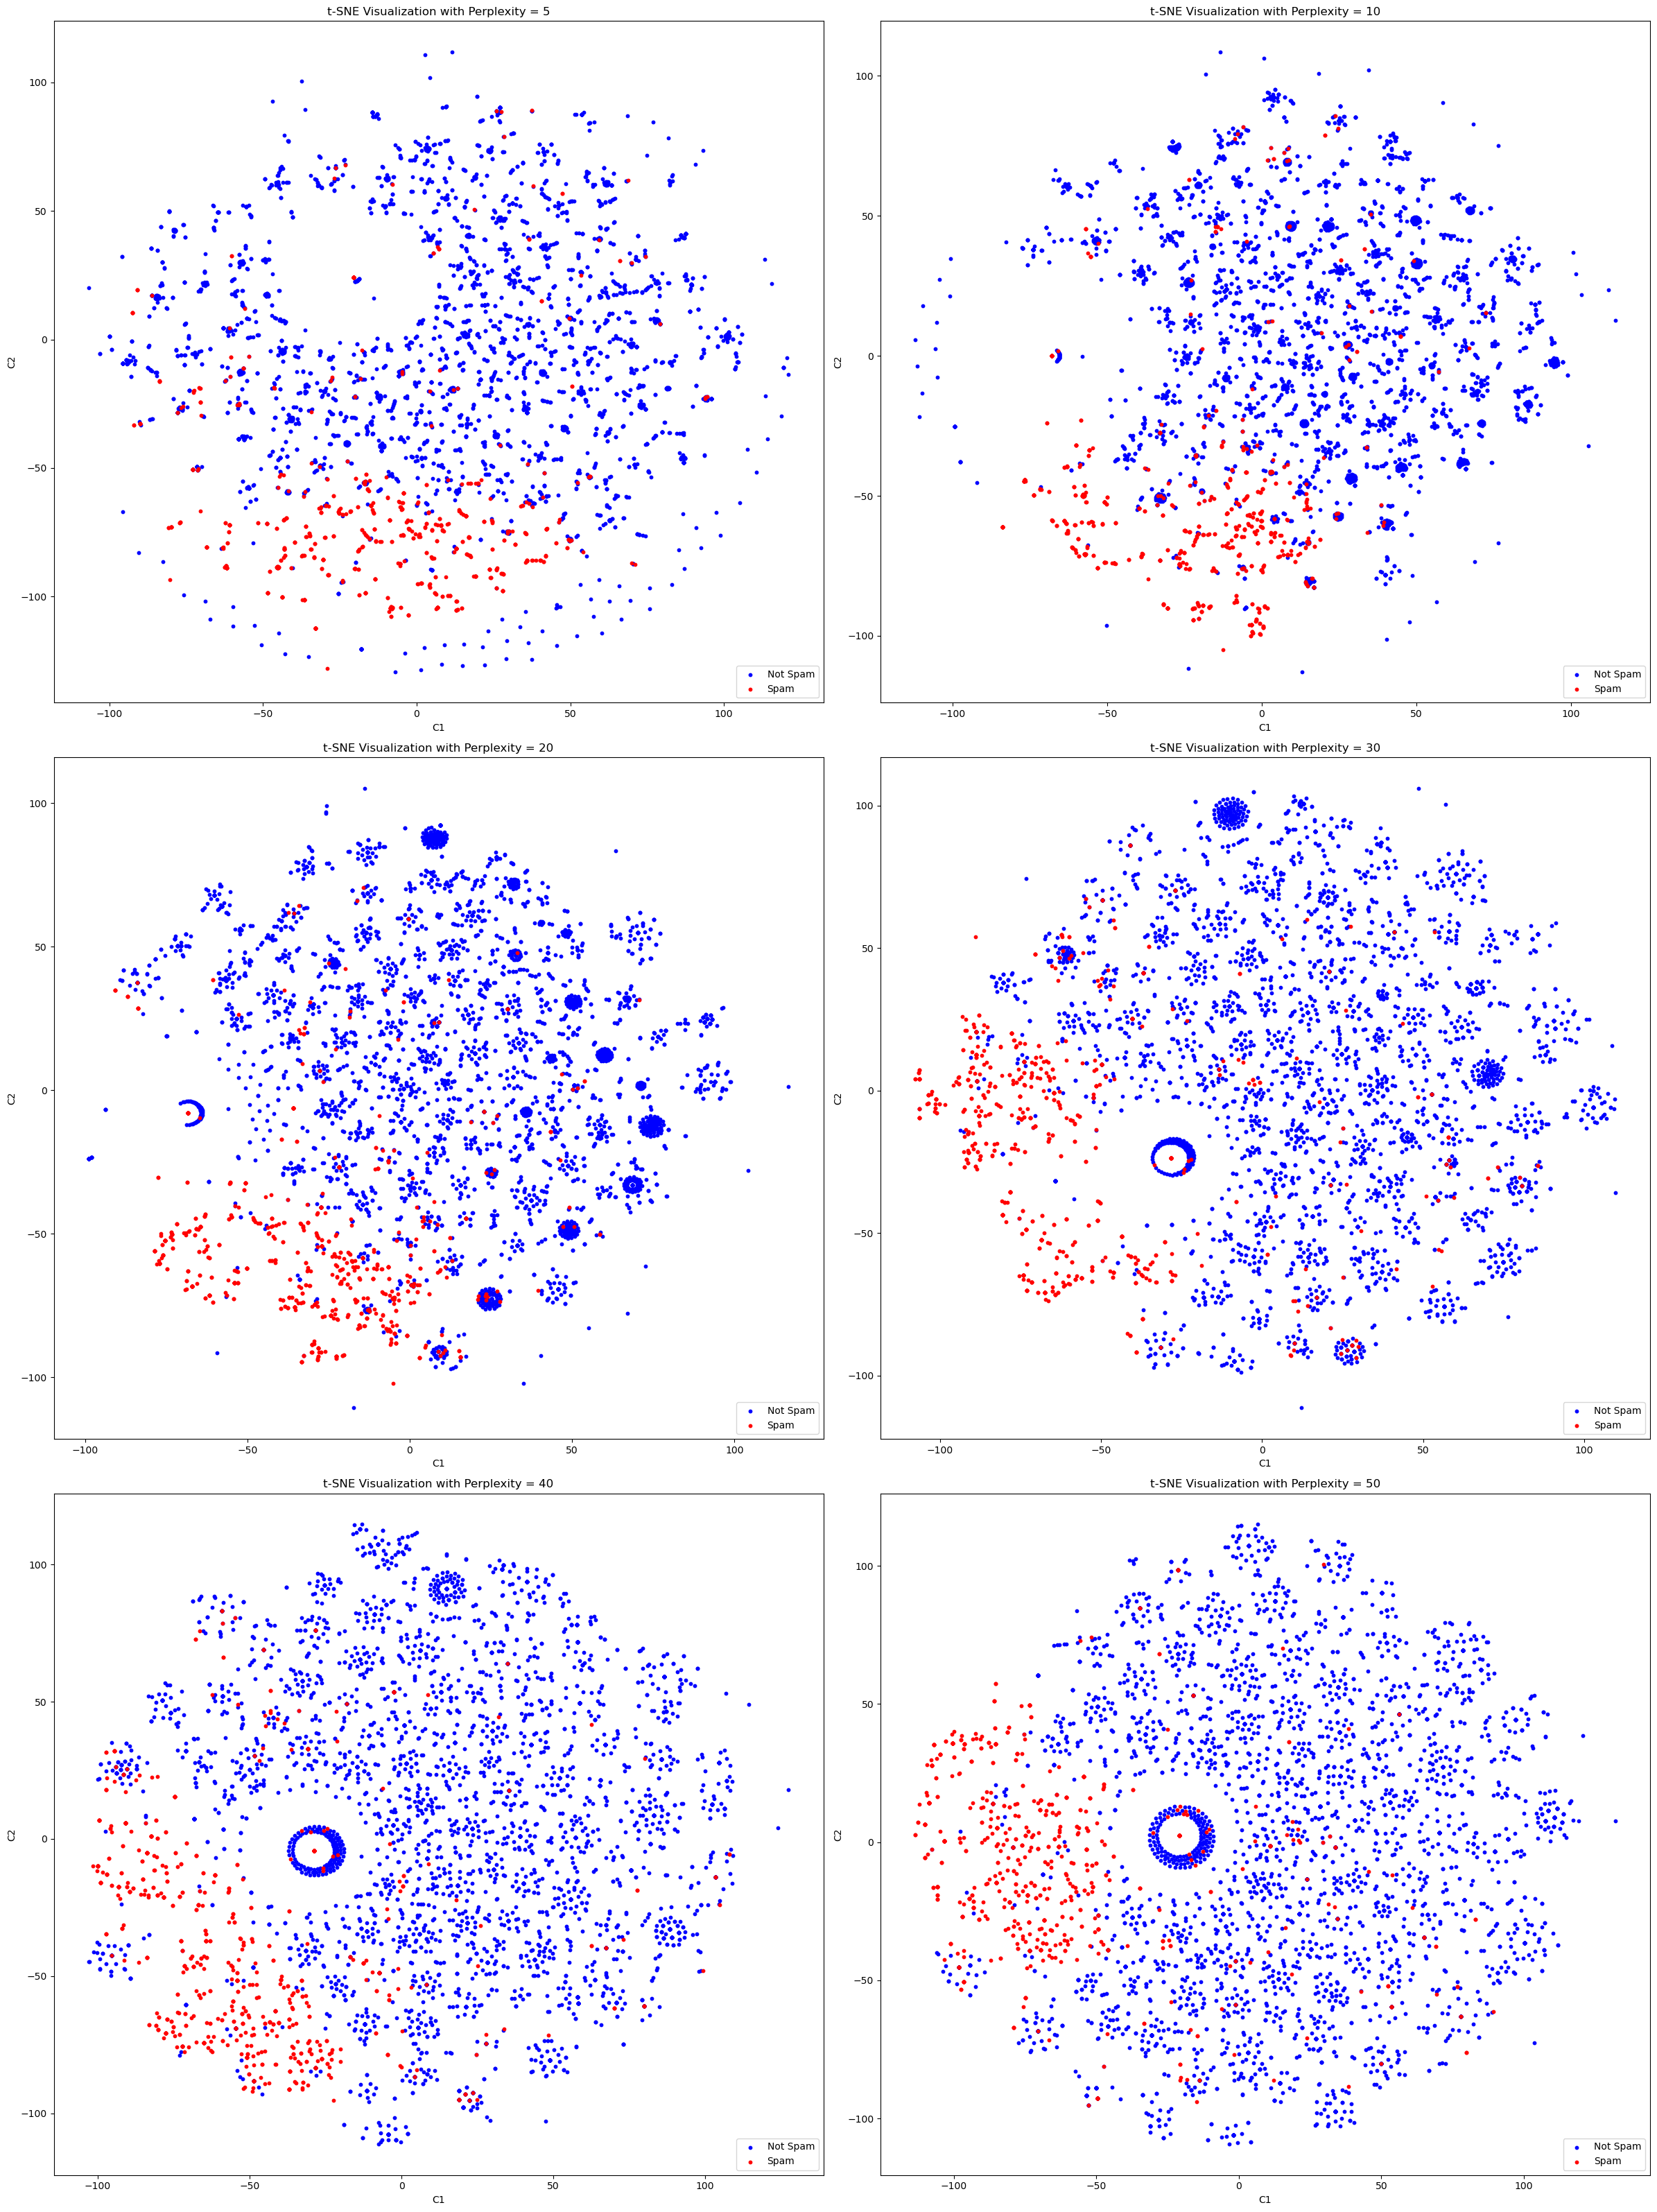

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(24, 32))

perplexities = [5, 10, 20, 30, 40, 50]
for i, perplexity in enumerate(perplexities):
    plot_TSNE(perplexity=perplexity, ax=axs[i//2, i%2])

plt.tight_layout()
plt.show()

We also want to try some other values of perplexity just in case they reveal more about the underlying structure of the data. 

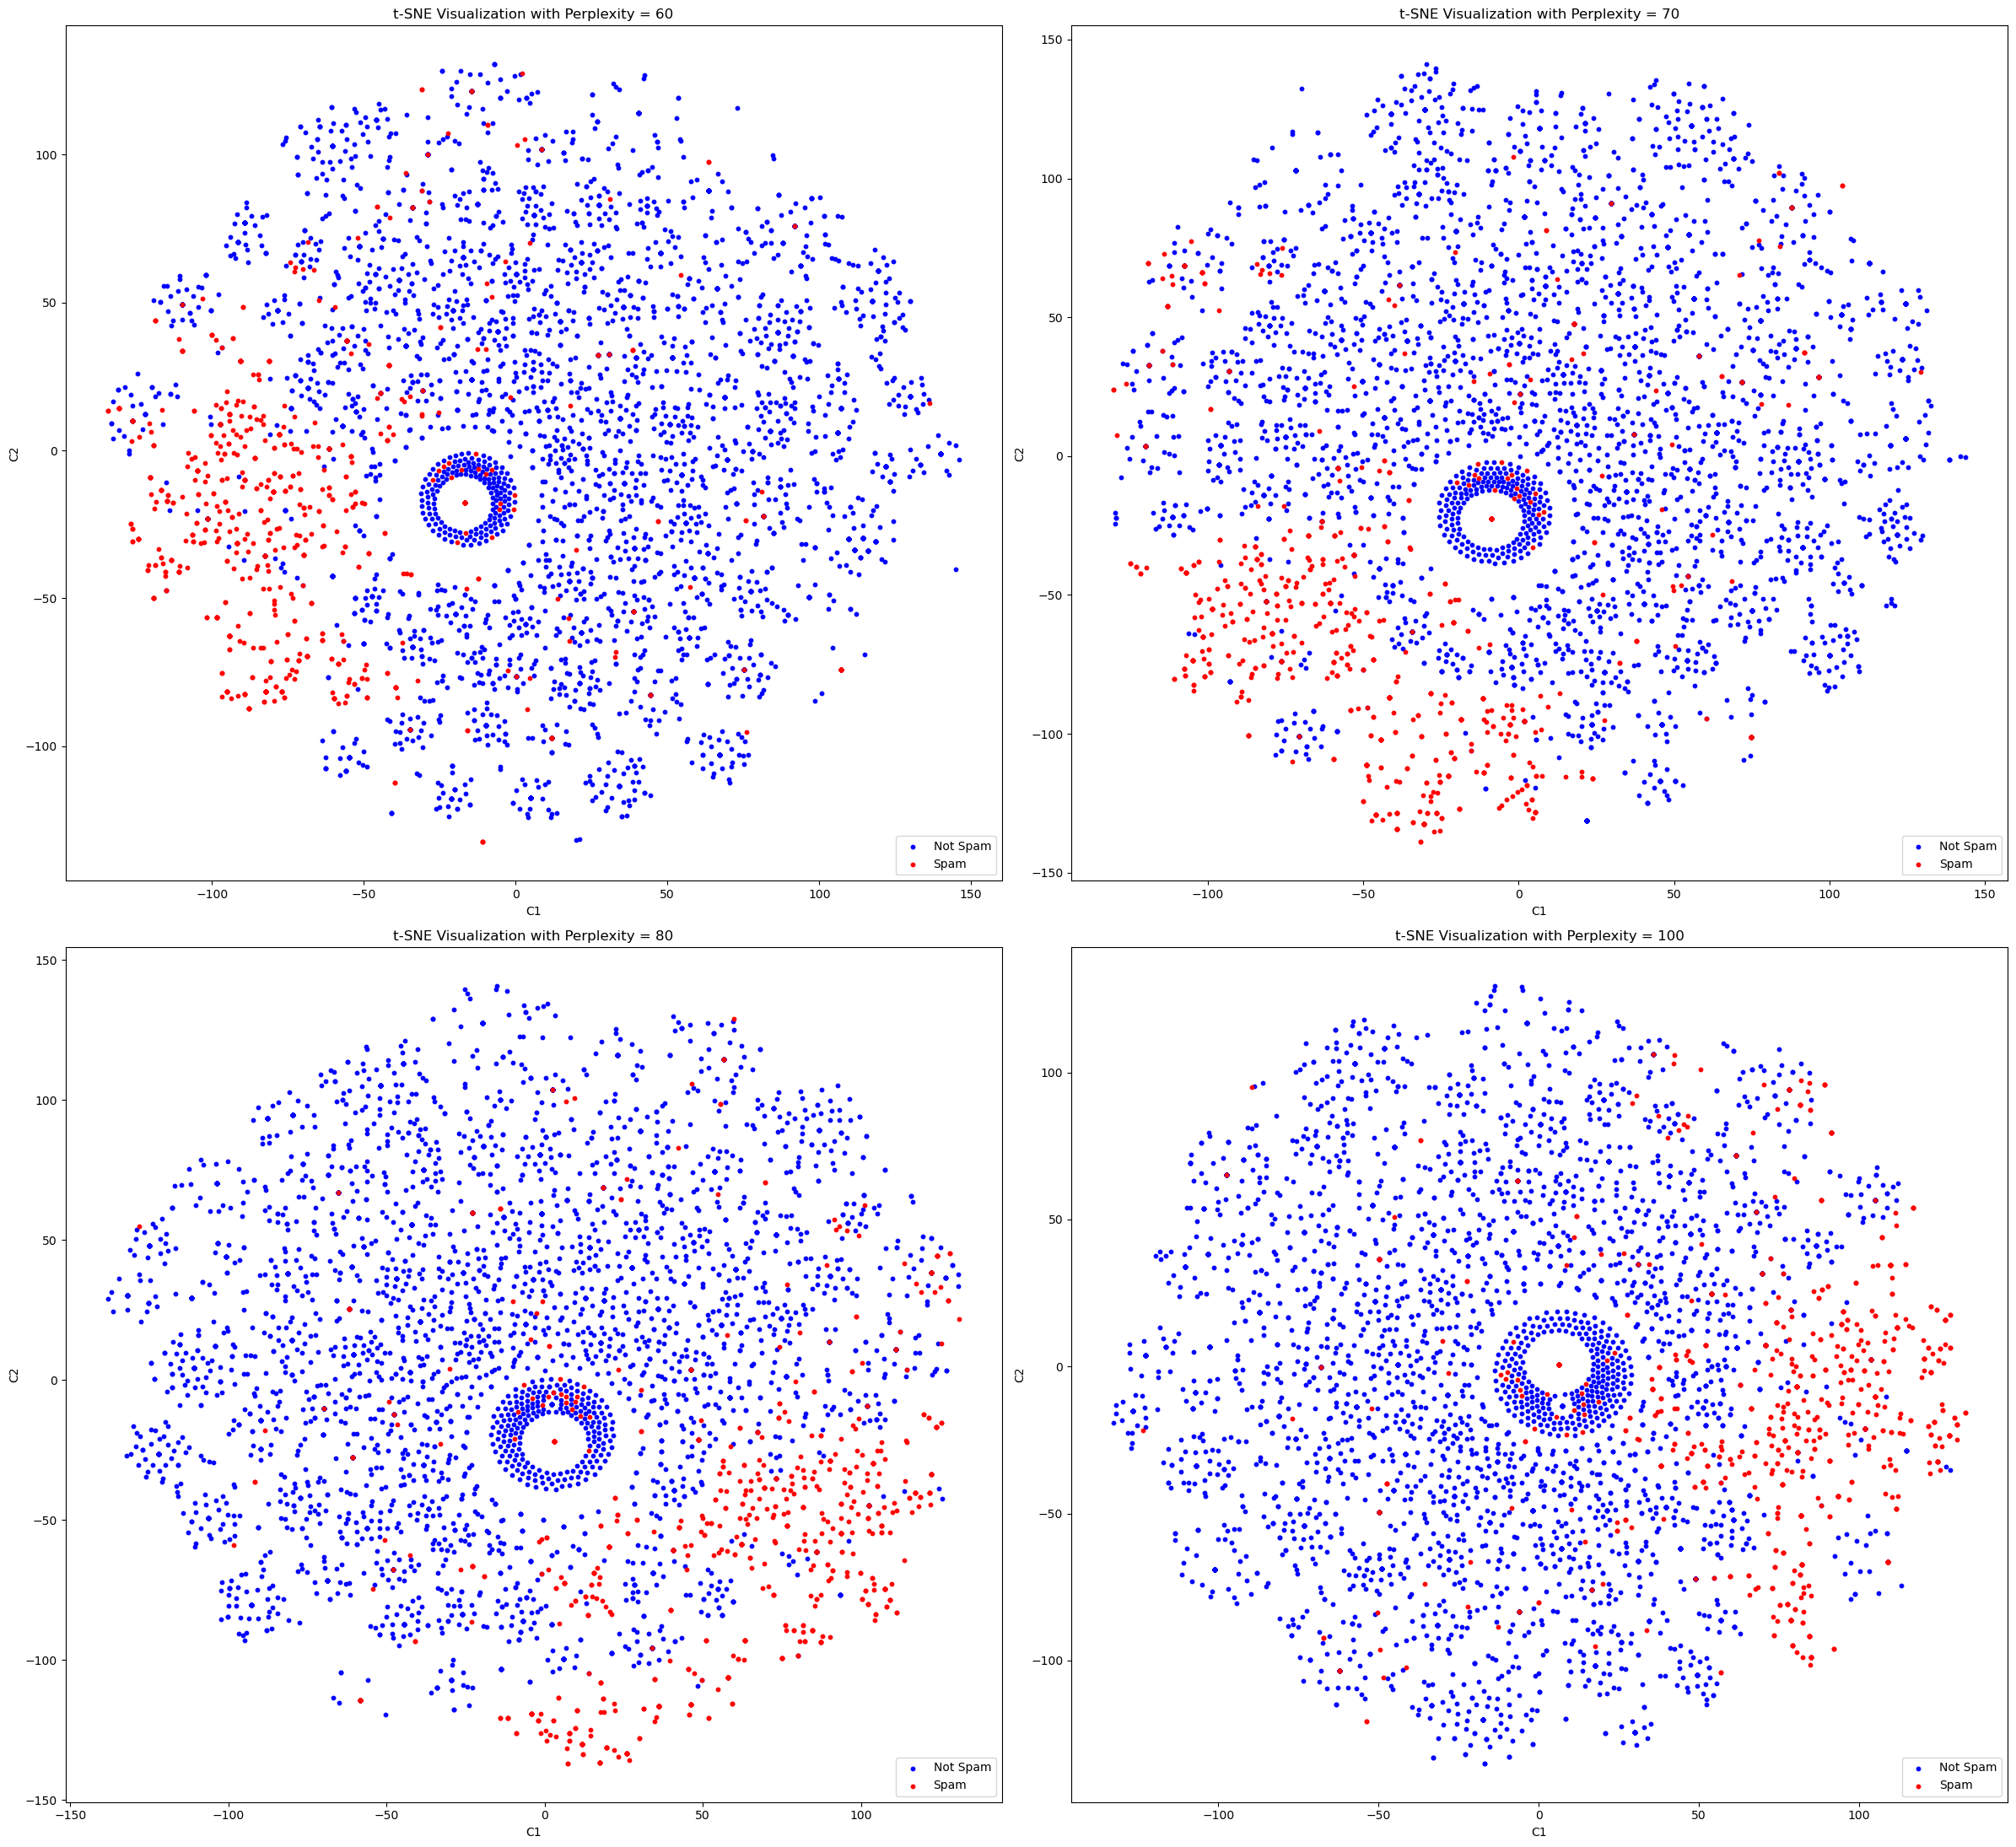

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(24, 22))

perplexities = [60, 70, 80, 100]
for i, perplexity in enumerate(perplexities):
    plot_TSNE(perplexity=perplexity, ax=axs[i//2, i%2])

plt.tight_layout()
plt.show()

Visually, it is clear that t-SNEs with perplexity values of 5-50 cluster spam and non-spam emails much better than t-SNEs of other perplexities. Out of the 5-50, we want to see which values are statistically superior in classification. 

In [10]:
from sklearn.metrics import accuracy_score
perplexities = [5, 10, 20, 30, 40, 50]
for perplexity in perplexities:
  tsne = TSNE(n_components=2, perplexity=perplexity, random_state=99)  
  X_tsne = tsne.fit_transform(X_tfidf.toarray())
  gmm = GaussianMixture(n_components=2, random_state=42)  
  gmm.fit(X_tsne)
  prediction = gmm.predict(X_tsne)
  print(f"Perplexity {perplexity}: {accuracy_score(y, prediction)}")


Perplexity 5: 0.6010409188801149
Perplexity 10: 0.7137473079684135
Perplexity 20: 0.2808686288585786
Perplexity 30: 0.42946877243359655
Perplexity 40: 0.4729002153625269
Perplexity 50: 0.4933596554199569


According to GMM, the perplexity of 10 has the statistically best accuracy in prediction of spam emails. We should look at the visualization of this GMM. 

In [11]:
tsne = TSNE(n_components=2, perplexity=10, random_state=99)  
X_tsne = tsne.fit_transform(X_tfidf.toarray())

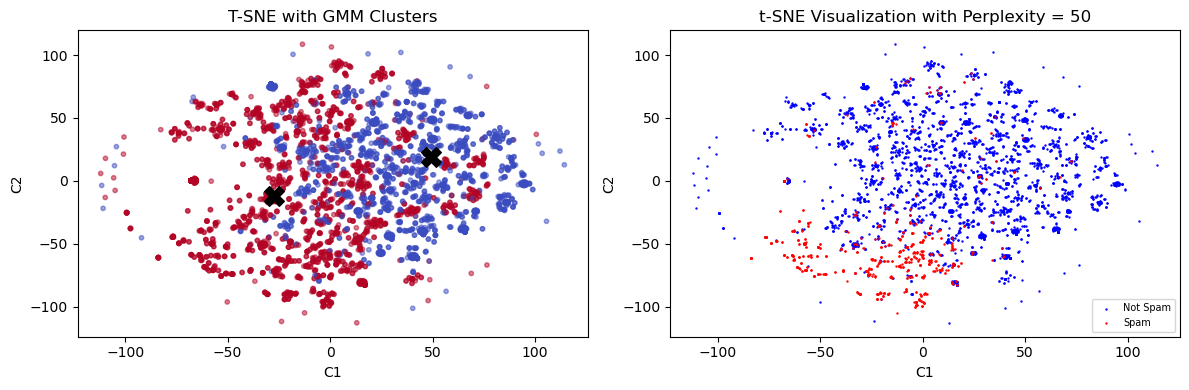

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=prediction, cmap='coolwarm_r', s=10, alpha=0.5)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='black', s=200, marker='X')
plt.title('T-SNE with GMM Clusters')
plt.xlabel('C1')
plt.ylabel('C2')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], c='blue', label='Not Spam', s=0.5)
plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], c='red', label='Spam', s=0.5)
plt.title(f't-SNE Visualization with Perplexity = {perplexity}')
plt.legend(loc='lower right', fontsize=7)
plt.xlabel('C1')
plt.ylabel('C2')

plt.tight_layout()  
plt.show()
